### Setup

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [48]:
import pandas as pd

pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width",200)

### Connect to Web GIS 

<img src="./img/licensing.jpg" />

In [3]:
import warnings 
warnings.filterwarnings("ignore", category=Warning)

In [4]:
from arcgis.gis import GIS
gis = GIS(profile="your_online_admin_profile")
um = gis.users

## Managing Named User Licenses and Entitlements

#### Use LicenseManager to list all organization licenses

In [5]:
%%capture --no-stdout --no-display

license_list = gis.admin.license.all()
license_list

[<ArcGIS Survey123 License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS Insights License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <Esri Redistricting License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS Pro License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS Drone2Map License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS Image Hosting License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS GeoBIM License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS for Power BI License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS GeoPlanner License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS AppStudio License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <Workflow Manager License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS Drone2Map License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >,
 <ArcGIS Workforce License @ https://geo

In [6]:
type(license_list[0])

arcgis.gis.admin._license.License

In [7]:
[lic.properties.listing["title"] for lic in license_list]

['ArcGIS Survey123',
 'ArcGIS Insights',
 'Esri Redistricting',
 'ArcGIS Pro',
 'ArcGIS Drone2Map',
 'ArcGIS Image Hosting',
 'ArcGIS GeoBIM',
 'ArcGIS for Power BI',
 'ArcGIS GeoPlanner',
 'ArcGIS AppStudio',
 'Workflow Manager',
 'ArcGIS Drone2Map',
 'ArcGIS Workforce',
 'ArcGIS Community Analyst',
 'Runtime Analysis ',
 'ArcGIS Navigator',
 'ArcGIS Field Maps',
 'ArcGIS Collector',
 'ArcGIS Tracker',
 'ArcGIS Location Sharing',
 'ArcGIS Business Analyst Web and Mobile Apps',
 'ArcGIS CityEngine']

#### Get a Single License with get() method

In [8]:
%%capture --no-stdout --no-display

pro_license = gis.admin.license.get("ArcGIS Pro")
pro_license

<ArcGIS Pro License @ https://geosaurus.maps.arcgis.com/sharing/rest/ >

##### Investigate who has licenses

The _all()_ method returns all users in the organization assigned the license:

In [9]:
len(pro_license.all())

20

Return a dictionary of properties for an individual user license:

In [10]:
pro_license.all()[14]

{'username': 'R_ArcGIS_UC2024',
 'lastLogin': -1,
 'disconnected': False,
 'entitlements': ['3DAnalystN',
  'desktopAdvN',
  'geostatAnalystN',
  'imageAnalystN',
  'networkAnalystN',
  'spatialAnalystN']}

#### Inspect one user's Pro licensing

Get a list of _username_ values from the license list. Methods of the _license_ object can take _User_ objects or _username_ strings as input:

In [11]:
[l["username"] for l in pro_license.all()]

['amolina2023',
 'andrew57',
 'ArcGISPyAPIBot',
 'arcgis_python',
 'bmajor_geosaurus',
 'dev_summit_24',
 'jyaist_geosaurus',
 'MMajumdar_geosaurus',
 'naubry_geosaurus',
 'NGiner_geosaurus',
 'nparavicini_geosaurus',
 'ptuteja_geosaurus',
 'pythondemo',
 'rsingh_geosaurus',
 'R_ArcGIS_UC2024',
 'sfoss_geosaurus',
 'ssong_geosaurus',
 'tiles_publisher_1',
 'tkukreja_geosaurus',
 'UC_2024_User']

The _check()_ method returns the entitlements (extensions) of the license assigned to a user.

In [12]:
pro_license.check(user="jyaist_geosaurus")

['desktopBasicN',
 '3DAnalystN',
 'desktopAdvN',
 'spatialAnalystN',
 'imageAnalystN']

The _user_entitilements()_ method returns additional properties in addition to the list of entitlements assigned to a user:

In [13]:
pro_license.user_entitlement("jyaist_geosaurus")

{'username': 'jyaist_geosaurus',
 'lastLogin': 1721161165000,
 'disconnected': False,
 'entitlements': ['3DAnalystN',
  'desktopAdvN',
  'desktopBasicN',
  'imageAnalystN',
  'spatialAnalystN']}

#### Revoke the License

In [14]:
pro_license.revoke(
    username="jyaist_geosaurus",
    entitlements=[
        "imageAnalystN",
        "spatialAnalystN",
    ]
)

True

#### Assign Licenses to a User

In [15]:
current = pro_license.user_entitlement(
    "jyaist_geosaurus"
)["entitlements"]
current

['3DAnalystN', 'desktopAdvN', 'desktopBasicN']

In [16]:
pro_license.assign(
        username="jyaist_geosaurus",
        entitlements=current + [
            "imageAnalystN",
            "spatialAnalystN",
            "smpAsiaPacificN",
            "smpEuropeN",
            "smpLAmericaN",
            "smpMidEAfricaN",
            "smpNAmericaN",
        ],
    )

True

In [17]:
pro_license.user_entitlement("jyaist_geosaurus")

{'username': 'jyaist_geosaurus',
 'lastLogin': 1721161165000,
 'disconnected': False,
 'entitlements': ['3DAnalystN',
  'desktopAdvN',
  'desktopBasicN',
  'imageAnalystN',
  'smpAsiaPacificN',
  'smpEuropeN',
  'smpLAmericaN',
  'smpMidEAfricaN',
  'smpNAmericaN',
  'spatialAnalystN']}

#### Plotting and Reporting on Licenses

The _plot()_ and _report()_ methods provide visualization and status reporting options.

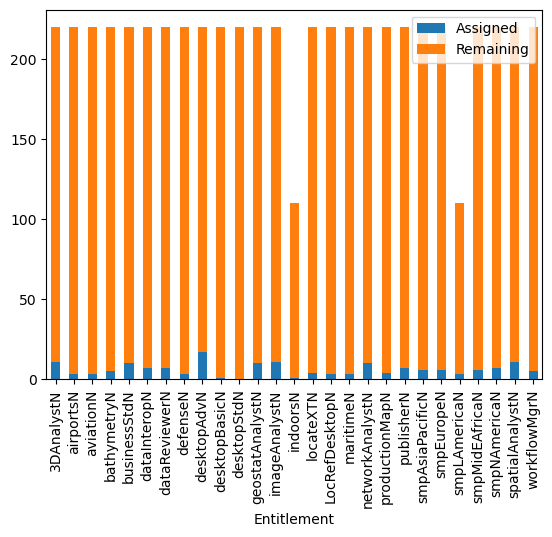

In [18]:
pro_license.plot()

In [19]:
%%capture --no-stdout --no-display

pro_license.report

,Entitlement,Total,Assigned,Remaining,Users
0,3DAnalystN,220,11,209,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
1,airportsN,220,3,217,"[{'user': 'ptuteja_geosaurus', 'lastUsed': None}, {'user': 'pythondemo', 'lastUsed': None}, {'us..."
2,aviationN,220,3,217,"[{'user': 'ptuteja_geosaurus', 'lastUsed': None}, {'user': 'pythondemo', 'lastUsed': None}, {'us..."
3,bathymetryN,220,5,215,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
4,businessStdN,220,10,210,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'andrew57', 'lastUsed': 'April 18, 2024'}, ..."
5,dataInteropN,220,7,213,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
6,dataReviewerN,220,7,213,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
7,defenseN,220,3,217,"[{'user': 'ptuteja_geosaurus', 'lastUsed': None}, {'user': 'pythondemo', 'lastUsed': None}, {'us..."
8,desktopAdvN,220,17,203,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'andrew57', 'lastUsed': 'April 18, 2024'}, ..."
9,desktopBasicN,220,1,219,"[{'user': 'jyaist_geosaurus', 'lastUsed': 'July 16, 2024'}]"


In [20]:
# Desktop Advanced
pro_license.report.loc[8]

Entitlement                                                                                            desktopAdvN
Total                                                                                                          220
Assigned                                                                                                        17
Remaining                                                                                                      203
Users          [{'user': 'amolina2023', 'lastUsed': None}, {'user': 'andrew57', 'lastUsed': 'April 18, 2024'}, ...
Name: 8, dtype: object

#### Removing Licenses for Stagnant Users

In [21]:
import datetime as dt
days_back:int = 365 *2
older_than = dt.datetime.now() - dt.timedelta(days=days_back)

In [22]:
pro_license.report

,Entitlement,Total,Assigned,Remaining,Users
0,3DAnalystN,220,11,209,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
1,airportsN,220,3,217,"[{'user': 'ptuteja_geosaurus', 'lastUsed': None}, {'user': 'pythondemo', 'lastUsed': None}, {'us..."
2,aviationN,220,3,217,"[{'user': 'ptuteja_geosaurus', 'lastUsed': None}, {'user': 'pythondemo', 'lastUsed': None}, {'us..."
3,bathymetryN,220,5,215,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
4,businessStdN,220,10,210,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'andrew57', 'lastUsed': 'April 18, 2024'}, ..."
5,dataInteropN,220,7,213,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
6,dataReviewerN,220,7,213,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'arcgis_python', 'lastUsed': 'July 02, 2024..."
7,defenseN,220,3,217,"[{'user': 'ptuteja_geosaurus', 'lastUsed': None}, {'user': 'pythondemo', 'lastUsed': None}, {'us..."
8,desktopAdvN,220,17,203,"[{'user': 'amolina2023', 'lastUsed': None}, {'user': 'andrew57', 'lastUsed': 'April 18, 2024'}, ..."
9,desktopBasicN,220,1,219,"[{'user': 'jyaist_geosaurus', 'lastUsed': 'July 16, 2024'}]"


In [23]:
users = pro_license.report.iloc[8]["Users"]

In [24]:
stale_users = []
for user in users:
    if user['lastUsed'] and (older_than > dt.datetime.strptime(user['lastUsed'], "%B %d, %Y")):
        stale_users.append(user['user'])
        print(f"[{user['user']:20} last used: {dt.datetime.strptime(user['lastUsed'], '%B %d, %Y')}]")
    elif user['lastUsed'] is None:
        stale_users.append(user['user'])

[ArcGISPyAPIBot       last used: 2022-04-23 00:00:00]
[naubry_geosaurus     last used: 2022-07-14 00:00:00]


In [25]:
stale_users

['amolina2023',
 'ArcGISPyAPIBot',
 'bmajor_geosaurus',
 'naubry_geosaurus',
 'ptuteja_geosaurus',
 'pythondemo',
 'R_ArcGIS_UC2024',
 'sfoss_geosaurus']

#### Querying and Assigning Named Licenses

In [26]:
pro_license.user_entitlement("pythondemo")

{'username': 'pythondemo',
 'lastLogin': -1,
 'disconnected': False,
 'entitlements': ['3DAnalystN',
  'airportsN',
  'aviationN',
  'bathymetryN',
  'businessStdN',
  'dataInteropN',
  'dataReviewerN',
  'defenseN',
  'desktopAdvN',
  'geostatAnalystN',
  'imageAnalystN',
  'locateXTN',
  'LocRefDesktopN',
  'maritimeN',
  'networkAnalystN',
  'productionMapN',
  'publisherN',
  'smpAsiaPacificN',
  'smpEuropeN',
  'smpMidEAfricaN',
  'smpNAmericaN',
  'spatialAnalystN',
  'workflowMgrN']}

To revoke an app"s license from a user, call the revoke() method from the corresponding License object.

In [27]:
pro_license.revoke(
    username="pythondemo", 
    entitlements=[
        "LocRefDesktopN",
        "maritimeN"
    ]
)

True

In [28]:
pro_license.user_entitlement("pythondemo")

{'username': 'pythondemo',
 'lastLogin': -1,
 'disconnected': False,
 'entitlements': ['3DAnalystN',
  'airportsN',
  'aviationN',
  'bathymetryN',
  'businessStdN',
  'dataInteropN',
  'dataReviewerN',
  'defenseN',
  'desktopAdvN',
  'geostatAnalystN',
  'imageAnalystN',
  'locateXTN',
  'networkAnalystN',
  'productionMapN',
  'publisherN',
  'smpAsiaPacificN',
  'smpEuropeN',
  'smpMidEAfricaN',
  'smpNAmericaN',
  'spatialAnalystN',
  'workflowMgrN']}

You can assign licenses to an application and its extensions using the assign() method.

In [29]:
current = pro_license.user_entitlement("pythondemo")["entitlements"]
current

['3DAnalystN',
 'airportsN',
 'aviationN',
 'bathymetryN',
 'businessStdN',
 'dataInteropN',
 'dataReviewerN',
 'defenseN',
 'desktopAdvN',
 'geostatAnalystN',
 'imageAnalystN',
 'locateXTN',
 'networkAnalystN',
 'productionMapN',
 'publisherN',
 'smpAsiaPacificN',
 'smpEuropeN',
 'smpMidEAfricaN',
 'smpNAmericaN',
 'spatialAnalystN',
 'workflowMgrN']

In [30]:
pro_license.assign(
    username="pythondemo", 
    entitlements= current + [
        "LocRefDesktopN",
        "maritimeN"
    ]
)

True

In [31]:
pro_license.user_entitlement("pythondemo")

{'username': 'pythondemo',
 'lastLogin': -1,
 'disconnected': False,
 'entitlements': ['3DAnalystN',
  'airportsN',
  'aviationN',
  'bathymetryN',
  'businessStdN',
  'dataInteropN',
  'dataReviewerN',
  'defenseN',
  'desktopAdvN',
  'geostatAnalystN',
  'imageAnalystN',
  'locateXTN',
  'LocRefDesktopN',
  'maritimeN',
  'networkAnalystN',
  'productionMapN',
  'publisherN',
  'smpAsiaPacificN',
  'smpEuropeN',
  'smpMidEAfricaN',
  'smpNAmericaN',
  'spatialAnalystN',
  'workflowMgrN']}

## Using Search Operations to Monitor Sites

- The `search` and `advanced_search` operations allows administrators to query GIS systems easily to find out information about the system
- The information can easily be parsed using other 3rd party libraries like pandas
- This information can be done multiple time a day or hour

### Monitoring Content Using Searches

#### Content Searches

Example: Finding Content Types Generated Using Searches

Whole document on advanced searching: https://doc.arcgis.com/en/arcgis-online/reference/advanced-search.htm

In [32]:
cm = gis.content

In [33]:
now = dt.datetime.now()
then = now - dt.timedelta(days=7)

In [34]:
search = cm.advanced_search(
            f"orgid: {gis.properties.id} AND created: [{int(then.timestamp()* 1000)} TO {int(now.timestamp()* 1000)}] AND accountid:{gis.properties.id}", 
            max_items=-1, 
            as_dict=True
)

In [35]:
items_created_in_last_week = pd.DataFrame(search["results"])

In [36]:
for a,b,c,d in zip(
    list(items_created_in_last_week.columns)[::4],
    list(items_created_in_last_week.columns)[1::4],
    list(items_created_in_last_week.columns)[2::4],
    list(items_created_in_last_week.columns)[3::4]):
    print(f"{a:30}{b:30}{c:30}{d:30}")

id                            owner                         created                       isOrgItem                     
modified                      guid                          name                          title                         
type                          typeKeywords                  description                   tags                          
snippet                       thumbnail                     documentation                 extent                        
categories                    spatialReference              accessInformation             classification                
licenseInfo                   culture                       properties                    advancedSettings              
url                           proxyFilter                   access                        size                          
subInfo                       appCategories                 industries                    languages                     
largeThumbnail                ba

In [37]:
items_created_in_last_week.owner.value_counts()

owner
arcgis_python            46
andrew57                 31
nparavicini_geosaurus    21
api_data_owner           19
NGiner_geosaurus         14
ssong_geosaurus           6
MMajumdar_geosaurus       4
ArcGISPyAPIBot            2
naubry_geosaurus          1
Name: count, dtype: int64

#### User Searches - User Login Activity

In [38]:
users = gis.users.advanced_search(
    f"accountid:{gis.properties.id}", 
    max_users=-1
)

##### Users who have never logged in

In [39]:
never_logged_in = [user 
                   for user in users["results"] 
                   if user["lastLogin"] == -1
                  ]

In [40]:
never_logged_in

[<User username:achapkowski_geosaurus>,
 <User username:achapkowski_geosaurus3>,
 <User username:janedoe123456>,
 <User username:sdf_geosaurus>,
 <User username:tarun00323>,
 <User username:tiles_publisher_1>,
 <User username:tiles_publisher_12>,
 <User username:user1_uc2024>,
 <User username:user3_uc2024>,
 <User username:user4_uc2024>,
 <User username:user5_uc2024>]

##### Users Haven't Logged in for 90+ Days

In [41]:
now = dt.datetime.now(dt.timezone.utc)

In [42]:
greater_than90days = [user 
                      for user in users["results"] 
                      if user["lastLogin"] > -1 and \
                        (now - dt.datetime.fromtimestamp(user["lastLogin"]/1000, dt.timezone.utc)).days >= 90
                     ]

Create list of usernames for printing.

In [43]:
greater_than90daysu = [u.username for u in greater_than90days]

In [44]:
for a,b,c,d in zip(
    greater_than90daysu[::4],
    greater_than90daysu[1::4],
    greater_than90daysu[2::4],
    greater_than90daysu[3::4]):
    print(f"{a:30}{b:30}{c:30}{d:30}")

amani_geosaurus               amolina2023                   arcgislearn_geosaurus         bmajor_geosaurus              
bwhitney2023                  clonerator                    creatoraccount                cwhitmore_geosaurus           
dave_crawford_geosaurus       DavidJVitale                  demo_user_10                  demo_user_37                  
demofedgis2024                dev_summit_24                 fedgisadmin                   forest_publisher              
geosaurus_hub                 githubaction                  headless_testing              imagery_geosaurus             
JerseyRocker6a7d              jmccune_geosaurus             kjain_geosaurus               kjoyce2023                    
KMathur_geosaurus             lirvin2023                    maggarwal_geosaurus           na_qaext01                    
NBAdvanced                    noarcispro                    nshampur_geosaurus            oauthlogintest                
ptuteja_geosaurus             py

In [47]:
#activity_item.delete()
#monthly_item.delete()